In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#### Dans le cadre d’un système de logique floue pour estimer la consommation d’une voiture, créez les variables floues suivantes :

#### 1. vitesse avec les ensembles {faible, moyenne, haute}

#### 2. température avec les ensembles {faible, haute}

#### 3. consommation avec les ensembles {petite, moyenne, grande}
#### Utilisez des fonctions d’appartenance trapézoïdales pour les entrées et une fonction d’appartenance triangulaire automatique pour la sortie.

In [2]:
# Créer les variables du problème
#ctrl.Antecedent(array of numbers, nom du variable)
vitesse = ctrl.Antecedent(np.arange(0, 200, 1), 'vitesse') #Antécédent correspond à une variable d’entrée pour le système flou.
temperature = ctrl.Antecedent(np.arange(16, 30, 1), 'temperature') #temperature est définie comme une variable d’entrée floue.
#ctrl.Consequent(array of numbers, nom du variable)
consommation = ctrl.Consequent(np.arange(5, 25, 1), 'consommation') #Conséquent correspond à une variable de sortie du système flou.

#automf: automatic membership functions (fonctions d’appartenance automatiques)
# automf(names=[définit les noms des catégories floues pour consommation]) (forme triangulaire)
consommation.automf(names=['petite', 'moyenne', 'grande'])#crée automatiquement des fonctions d’appartenance floues pour la variable.


# Créer des fonctions d'appartenance à l'aide de différents types
vitesse['faible'] = fuzz.trapmf(vitesse.universe, [0, 0, 30, 60]) #crée une fonction d’appartenance pour la catégorie floue 'faible' de la variable vitesse
vitesse['moyenne'] = fuzz.trapmf(vitesse.universe, [50, 70, 120, 150]) #fonction d’appartenance en trapèze. Défini par 4 points [a, b, c, d]
vitesse['haute'] = fuzz.trapmf(vitesse.universe, [110, 140, 200, 200]) #a,d (début et fin où l’appartenance est 0);b,c (ébut et fin où l’appartenance est 1)

temperature['faible'] = fuzz.trapmf(temperature.universe, [16, 16, 20, 25])
temperature['haute'] = fuzz.trapmf(temperature.universe,[20, 25, 30, 50])


#### En vous basant sur les variables floues définies précédemment, affichez leurs fonctions d’appartenance à l’aide de la méthode view()

c:\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


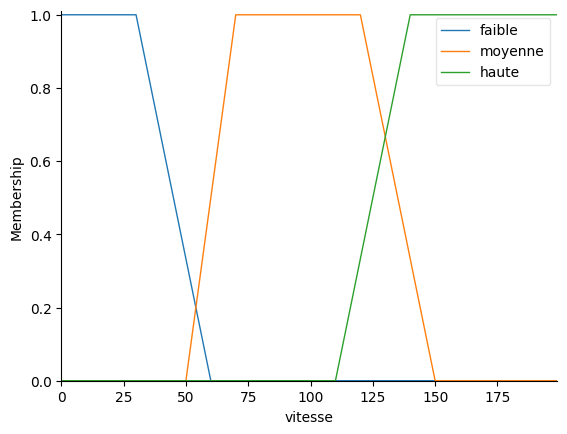

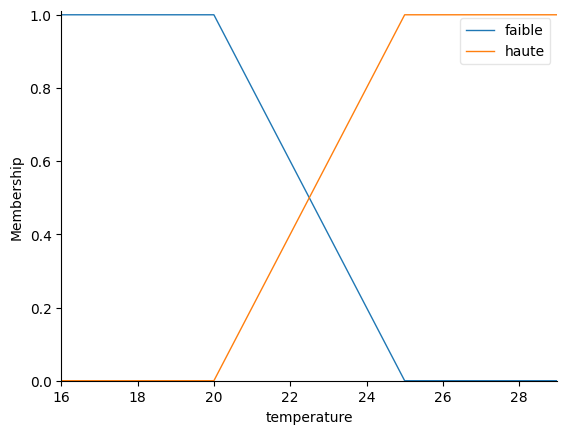

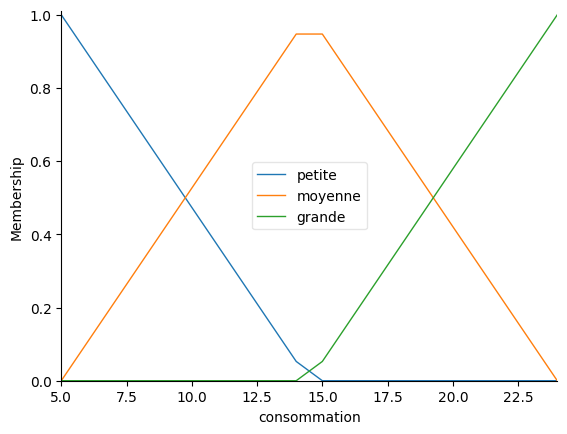

In [3]:
vitesse.view() #affiche un graphique de toutes les fonctions d’appartenance définies pour cette variable.
temperature.view()
consommation.view()
#membership: degré d'appartenance



#### Écrivez les règles floues reliant la vitesse, la température et la consommation dans le système de contrôle flou.

In [4]:
#definition des règles floues:
rule1 = ctrl.Rule(vitesse['faible'] & temperature['faible'], consommation['petite'])
rule2 = ctrl.Rule(vitesse['faible'] & temperature['haute'], consommation['petite'])
rule3 = ctrl.Rule(vitesse['moyenne'] & temperature['faible'], consommation['grande'])
rule4 = ctrl.Rule(vitesse['moyenne'] & temperature['haute'], consommation['moyenne'])
rule5 = ctrl.Rule(vitesse['haute'] & temperature['faible'], consommation['grande'])
rule6 = ctrl.Rule(vitesse['haute'] & temperature['haute'], consommation['grande'])

#### En utilisant les règles floues définies précédemment, créez le système de contrôle flou et simulez son comportement pour une vitesse de 110 et une température de 22.
#### Affichez ensuite la valeur de la consommation calculée.

In [5]:
#regrouper toutes les règles floues pour créer un système flou complet.
consommation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
# permet de donner des valeurs d’entrée réelles et de calculer la sortie correspondante.
consommation_simulator= ctrl.ControlSystemSimulation(consommation_ctrl)

#Saisie des valeurs de vitesse et de température
consommation_simulator.input['vitesse'] = 135
consommation_simulator.input['temperature'] = 24

#Résultat calculé
consommation_simulator.compute()
print(consommation_simulator.output['consommation'])

16.338605442176867


#### Visualisez, à l’aide de la méthode view(sim=...), les fonctions d’appartenance des variables floues pour illustrer la position des valeurs d’entrée et de sortie issues de la simulation.

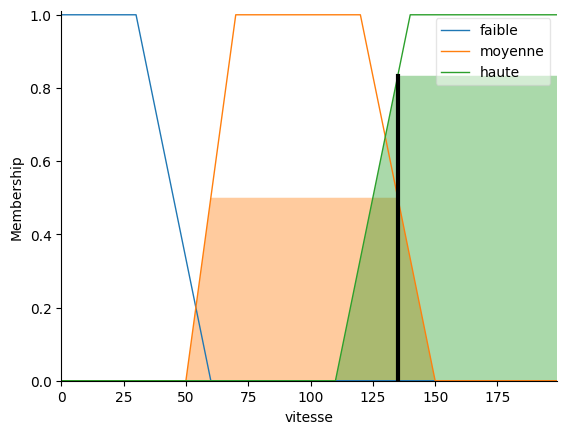

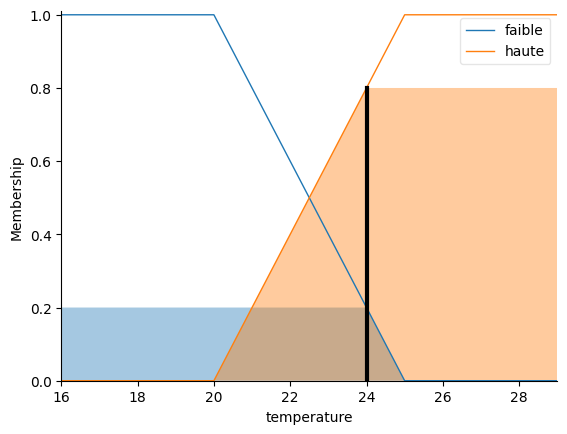

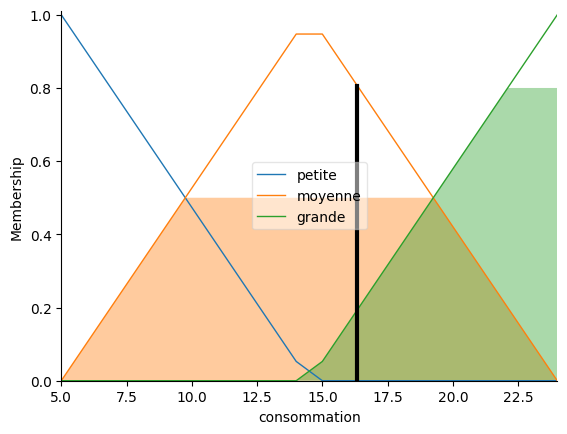

In [6]:
#En ajoutant sim=.., on indique que le graphique doit montrer la valeur d’entrée actuelle et l’effet sur la sortie.
vitesse.view(sim=consommation_simulator)
temperature.view(sim=consommation_simulator)
consommation.view(sim=consommation_simulator)